In [ ]:
import pandas as pd
import numpy as np
import random
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_alco=pd.read_csv('/content/drive/MyDrive/data_for_proj/cardio_alco.csv')  #reading the dataset
df_alco.head()

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *['id;alco'], **{})
chart

In [ ]:
df_base=pd.read_csv('/content/drive/MyDrive/data_for_proj/cardio_base.csv')  #reading the dataset
df_base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [ ]:
df_data=pd.read_csv('/content/drive/MyDrive/data_for_proj/covid_data.csv')  #reading the dataset
df_data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [ ]:
df_data.nunique()

location                       212
date                           163
new_cases                     2073
new_deaths                     634
population                     211
aged_65_older_percent          183
gdp_per_capita                 184
hospital_beds_per_thousand     100
dtype: int64

ROWS

In [ ]:
print(df_data.shape[0],
df_base.shape[0],
df_alco.shape[0])

23082 70000 56903


In [ ]:
df_alco['id;alco'].nunique()

56903

In [ ]:
df_base['id'].nunique()

70000

In [ ]:
df_data['date'].nunique()

163

In [ ]:
df_data.isna().sum() ### missing values

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

In [ ]:
df_alco.duplicated().sum()

0

In [ ]:
df_base.query("gender == 2 and smoke == 1").smoke.sum()

5356

In [ ]:
df_base.query("gender == 1 and smoke == 1").smoke.sum()

813

In [ ]:
5356-813

4543

In [ ]:
df_base.height.mean()

164.35922857142856

In [ ]:
max=165
for i in range((df_base.height>0).sum()):
  if (df_base.height[i]>max):
    max =df_base.height[i]

max

250

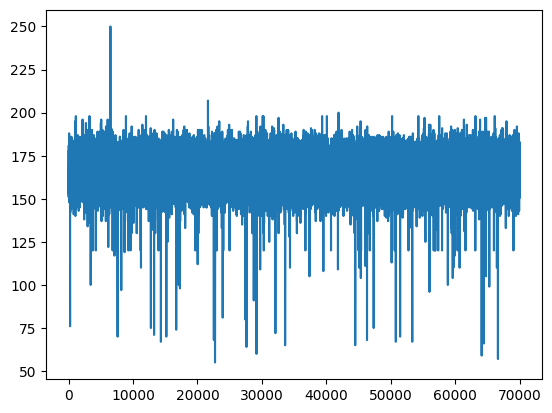

In [ ]:
plt.plot(df_base.height)

In [ ]:
df_base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [ ]:
coef_b, p = spearmanr(df_base.ap_hi, df_base.ap_lo)
coef_b

0.7354361051379776

In [ ]:
coef_a, p = spearmanr(df_base.age, df_base.weight)
coef_a

0.06155893830937044

In [ ]:
coef_g, p = spearmanr(df_base.gender, df_base.height)
coef_g

0.5338045129524459

In [ ]:
stand=df_base.height.std()
stand

8.210126364538038

In [ ]:
(df_base.height>(df_base.height.mean()+2*stand)).sum()+(df_base.height<(df_base.height.mean()-2*stand)).sum()

2335

In [ ]:
(df_base.height>0).sum()

70000

In [ ]:
2335/70000

0.033357142857142856

In [ ]:
df_alco.head()

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0


In [ ]:
print(df_alco['id;alco'].apply(lambda x: pd.Series(str(x).split(";"))));


           0  1
0         44  0
1         45  0
2         46  0
3         47  0
4         49  0
...      ... ..
56898  99949  0
56899  99950  0
56900  99951  0
56901  99952  0
56902  99954  0

[56903 rows x 2 columns]


In [ ]:
df_alco2[['id','alco']]=df_alco['id;alco'].apply(lambda x: pd.Series(str(x).split(";")));
df_alco2[1]

0        0
1        0
2        0
3        0
4        0
        ..
56898    0
56899    0
56900    0
56901    0
56902    0
Name: 1, Length: 56903, dtype: object

In [ ]:
df_alco2.head()


,0,1,id,alco
0,44,0,44,0
1,45,0,45,0
2,46,0,46,0
3,47,0,47,0
4,49,0,49,0


In [ ]:
df_main=df_alco2[1]+df_alco2[0]


In [ ]:
df_main

0           044
1           045
2           046
3           047
4           049
          ...  
56898    099949
56899    099950
56900    099951
56901    099952
56902    099954
Length: 56903, dtype: object

In [ ]:
df_base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [ ]:
df_data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['date'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_3, *['index', 'count()', 'date'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_4, *['date', 'count()', 'date'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['new_cases', 'count()', 'date'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['new_deaths', 'count()', 'date'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_8, *['index', 'date'], **{'inner': 'stick'})
chart

In [ ]:
df_data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [ ]:
(df_data.location=='Italy').sum()

163

In [ ]:
df_data[(df_data.location=='Italy')].new_cases.sum()

235561

In [ ]:
df_data[(df_data.location=='Germany')].new_cases.sum()

184861

In [ ]:
df_data[(df_data.location=='Italy')].new_cases

10688      0
10689      0
10690      0
10691      0
10692      0
        ... 
10846    518
10847    270
10848    197
10849    280
10850    283
Name: new_cases, Length: 163, dtype: int64

In [ ]:
df_data.shape[0]

23082

In [ ]:
for i in range(df_data.shape[0]):
  if (df_data[(df_data.location=='Italy')].new_cases[0:i].sum()-df_data[(df_data.location=='Germany')].new_cases[0:i].sum())>10000:
    print(i);break;

73


In [ ]:
df_data[(df_data.location=='Italy')].date[0:73]

10688    2019-12-31
10689    2020-01-01
10690    2020-01-02
10691    2020-01-03
10692    2020-01-04
            ...    
10756    2020-03-08
10757    2020-03-09
10758    2020-03-10
10759    2020-03-11
10760    2020-03-12
Name: date, Length: 73, dtype: object

In [ ]:
to_graph=[]
for i in range(df_data[(df_data.location=='Italy')].shape[0]):
  to_graph.append(df_data[(df_data.location=='Italy')].new_cases[0:i])
to_graph

[Series([], Name: new_cases, dtype: int64),
 10688    0
 Name: new_cases, dtype: int64,
 10688    0
 10689    0
 Name: new_cases, dtype: int64,
 10688    0
 10689    0
 10690    0
 Name: new_cases, dtype: int64,
 10688    0
 10689    0
 10690    0
 10691    0
 Name: new_cases, dtype: int64,
 10688    0
 10689    0
 10690    0
 10691    0
 10692    0
 Name: new_cases, dtype: int64,
 10688    0
 10689    0
 10690    0
 10691    0
 10692    0
 10693    0
 Name: new_cases, dtype: int64,
 10688    0
 10689    0
 10690    0
 10691    0
 10692    0
 10693    0
 10694    0
 Name: new_cases, dtype: int64,
 10688    0
 10689    0
 10690    0
 10691    0
 10692    0
 10693    0
 10694    0
 10695    0
 Name: new_cases, dtype: int64,
 10688    0
 10689    0
 10690    0
 10691    0
 10692    0
 10693    0
 10694    0
 10695    0
 10696    0
 Name: new_cases, dtype: int64,
 10688    0
 10689    0
 10690    0
 10691    0
 10692    0
 10693    0
 10694    0
 10695    0
 10696    0
 10697    0
 Name: n

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: ignored

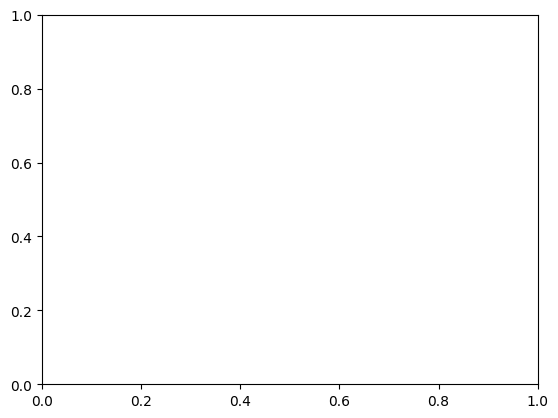

In [ ]:
plt.plot(to_graph)

In [ ]:
df_data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [ ]:
df_data.location.unique

<bound method Series.unique of 0          Afghanistan
1          Afghanistan
2          Afghanistan
3          Afghanistan
4          Afghanistan
             ...      
23077    International
23078    International
23079    International
23080    International
23081    International
Name: location, Length: 23082, dtype: object>

In [ ]:
print(df_data[(df_data.location=='Italy')].new_deaths.sum())

34043

In [ ]:
df_data[(df_data.location=='Spain')].new_deaths.sum()

27136

In [ ]:
df_data[(df_data.location=='Belgium')].new_deaths.sum()

9619

In [ ]:
df_data[(df_data.location=='Andora')].new_deaths.sum()

0

In [ ]:
df_data[(df_data.location=='USA')].new_deaths.sum()

0